<a href="https://colab.research.google.com/github/marcosrbenso/data-scence-para-engenharia-de-biossistemas/blob/main/LEB2150_Aula_7_Introdu%C3%A7%C3%A3o_%C3%A0_ci%C3%AAncia_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# https://www.kaggle.com/datasets/llatyki/brazilan-agricultural-production

path = kagglehub.dataset_download("llatyki/brazilan-agricultural-production")

planted_area = pd.read_csv(f"{path}/planted_area.csv")
production = pd.read_csv(f"{path}/production.csv")
harvested_area = pd.read_csv(f"{path}/harvested_area.csv")
yield_df = pd.read_csv(f"{path}/yield.csv")

Using Colab cache for faster access to the 'brazilan-agricultural-production' dataset.


In [60]:
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Columns: 5566 entries, Unnamed: 0 to Brasília (DF)
dtypes: float64(5563), int64(2), object(1)
memory usage: 19.5+ MB


In [61]:
yield_df.head()

,Unnamed: 0,Grain,Year,Alta Floresta D'Oeste (RO),Ariquemes (RO),Cabixi (RO),Cacoal (RO),Cerejeiras (RO),Colorado do Oeste (RO),Corumbiara (RO),...,Uruaçu (GO),Uruana (GO),Urutaí (GO),Valparaíso de Goiás (GO),Varjão (GO),Vianópolis (GO),Vicentinópolis (GO),Vila Boa (GO),Vila Propício (GO),Brasília (DF)
0,0,Sorghum,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Wheat,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sorghum,1975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wheat,1975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Sorghum,1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
yield_df['Ariquemes (RO)'].mean()

np.float64(1.360813929026747)

In [63]:
yield_df['Grain'].unique()

array(['Sorghum', 'Wheat', 'Maize', 'Soybeans', 'Fava Beans', 'Beans',
       'Oats', 'Rye', 'Barley', 'Pea'], dtype=object)

In [64]:
yield_long = yield_df.melt(
    id_vars=['Unnamed: 0','Grain','Year'],
    var_name='Municipality',
    value_name='Yield'
)

yield_long.head()


,Unnamed: 0,Grain,Year,Municipality,Yield
0,0,Sorghum,1974,Alta Floresta D'Oeste (RO),NaN
1,1,Wheat,1974,Alta Floresta D'Oeste (RO),NaN
2,2,Sorghum,1975,Alta Floresta D'Oeste (RO),NaN
3,3,Wheat,1975,Alta Floresta D'Oeste (RO),NaN
4,4,Sorghum,1976,Alta Floresta D'Oeste (RO),NaN


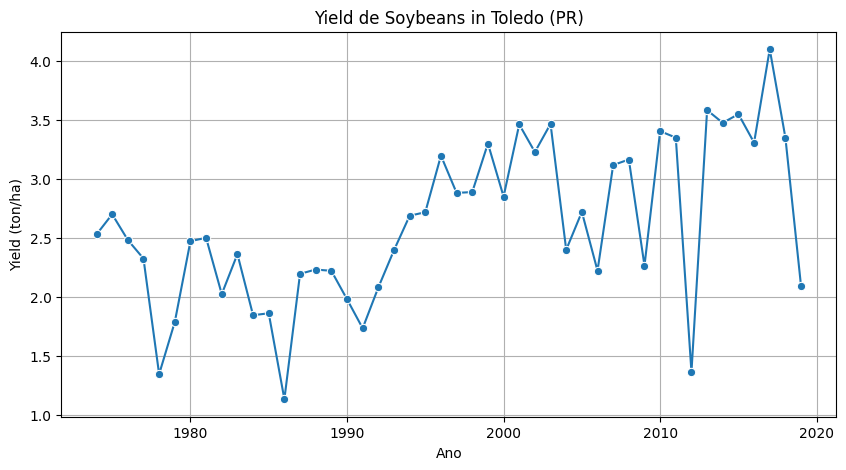

In [65]:
muni = "Toledo (PR)"
crop = 'Soybeans'
df_plot = yield_long[(yield_long['Municipality'] == muni) &
                     (yield_long['Grain'] == crop)]

plt.figure(figsize=(10,5))
sns.lineplot(data=df_plot, x='Year', y='Yield', marker='o')
plt.title("Yield de {} in {}".format(crop, muni))
plt.xlabel("Ano")
plt.ylabel("Yield (ton/ha)")
plt.grid(True)
plt.show()

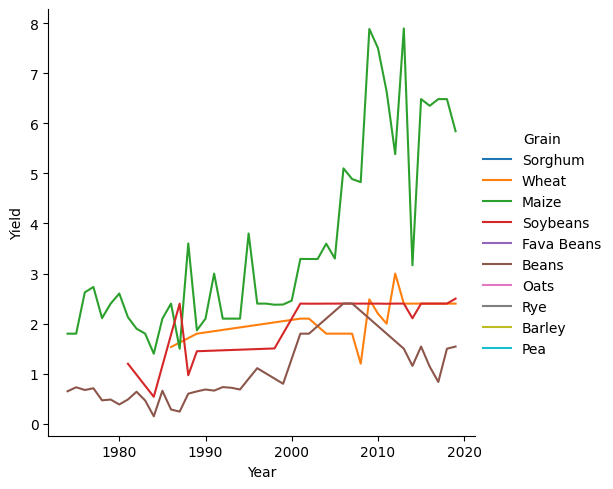

In [66]:
muni = "Piracicaba (SP)"
sns.relplot(
    data=yield_long[(yield_long['Municipality'] == muni)],
    kind = 'line',
    x="Year", y="Yield",
    hue='Grain',
    facet_kws=dict(sharex=False)
)